    Result  Duration Type  KDA Ratio  Multikill  Level   CS  CS per min  \
0   Defeat        26   AP   0.900000          0     11   40         1.5   
1   Defeat        22   AD   2.000000          0     12  106         4.6   
2  Victory        32   AD   6.750000          2     17  178         5.5   
3  Victory        33   AP   2.777778          0     17  225         6.7   
4   Defeat        22   AP   3.000000          0     11   49         2.1   

   Kill Participation  Wards  
0                  45      7  
1                  59      7  
2                  68     12  
3                  78      7  
4                  50      9  
      Result  Duration Type  KDA Ratio  Multikill  Level   CS  CS per min  \
181  Victory        24   AP        4.0          0     15  188         7.6   
182  Victory        30   AP        1.8          2     16  214         7.1   
183   Defeat        23   AP        4.0          0     14  149         6.3   
184  Victory        27   AP       12.0          2     1

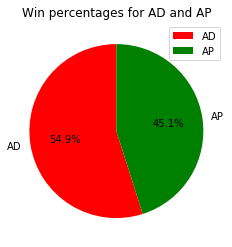

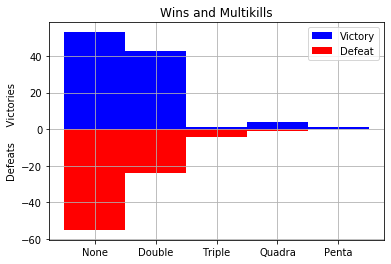

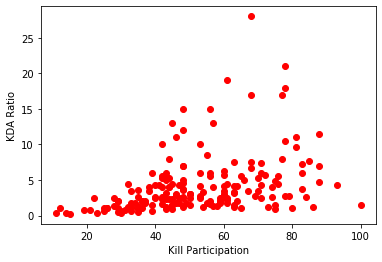

[[1.        0.3864917]
 [0.3864917 1.       ]]


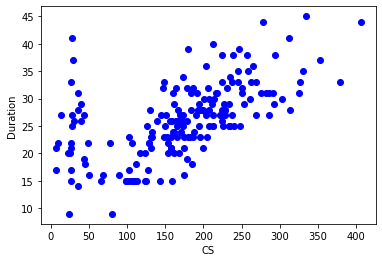

[[1.         0.59551752]
 [0.59551752 1.        ]]


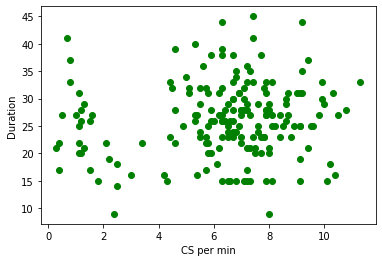

[[1.         0.11483844]
 [0.11483844 1.        ]]


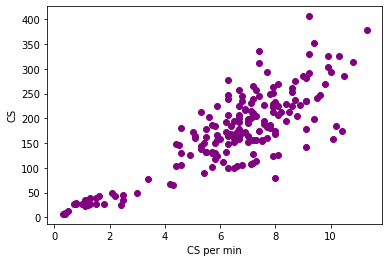

[[1.         0.83936384]
 [0.83936384 1.        ]]


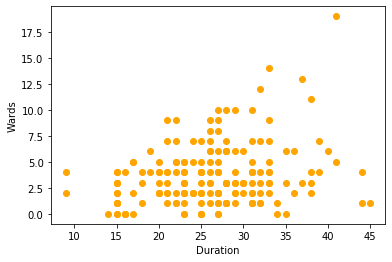

[[1.         0.26675183]
 [0.26675183 1.        ]]


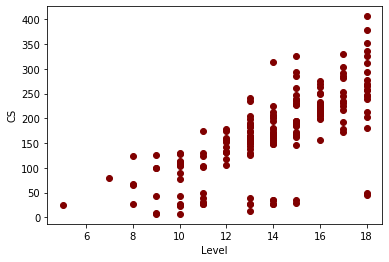

[[1.         0.71965147]
 [0.71965147 1.        ]]


In [2]:
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Function to clean the data
def data_cleaner(df):
    
    """
    param: df is a data frame containing all the data which is to be cleaned
    
    return : a cleaned data frame, removing unwanted columns and rows
    
    """
    # Removing the 'Champion' column as it was only used to determine AP or AD
    # Removing Kills, Deaths and Assists columns as it was only used to determine
    # the KDA Ratio
    
    df.drop(['Champion', 'Kills', 'Deaths', 'Assists', 'Unnamed: 0'] , axis=1, inplace=True)
    
    # Removing the rows in which result of the match is 'Remake' as those matches are not played
    # Removing games with perfect KDA (100.0) as it is not common at all
    
    df.drop(df[df['Result'] == 'Remake'].index, inplace=True)
    df.drop(df[df['KDA Ratio'] == 100.0].index, inplace=True)
    
    
    # Resetting the index after removing rows
    
    df.reset_index(drop = True, inplace = True)
    
    # Now there are 198 Values instead of 200. Hence 2 rows have been removed
            
    return df
    

# Function to find the mean, median and standard deviation of 'Duration', 'KDA Ratio',
# 'Multikill', 'Level', 'CS' , 'CS per min', 'Kill Participation' and 'Wards'
def data_stats(df, col_name):
    
    """
    param: df is the dataframe
    
    param: col_name is the column for which we are finding out mean, median and standard deviation
    
    return: tuple containing mean, median and standard deviation
    
    """
    mean = df[col_name].mean()
    median = df[col_name].median()
    stddev = df[col_name].std()
    
    stats_tuple = (mean, median, stddev)
    
    return stats_tuple

# Function to check if there are outliers in any of the columns: 'Duration', 'KDA Ratio',
# 'Multikill', 'Level', 'CS' , 'CS per min', 'Kill Participation' and 'Wards'
# Outlier is specified by a value that is 3 standard deviations away from the mean
outliers=[]
def detect_outlier(data_1):
    
    """
    param: data_1 is the column
    
    return: True if outliers exist and False if they do not
    
    """
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            return True
        return False
    
def pie_chart(Cleaned_League_Data):
    
    """
    param: cleaned_League_Data is the cleaned data which is used for pie chart visualization
    
    return: nothing
    
    """
    
    # Pie chart between win% for AP compared to AD
    AD_wins = 0
    AP_wins = 0
    total_wins = 0
    res = list(Cleaned_League_Data['Result'])
    typ = list(Cleaned_League_Data['Type'])
    for i in range(len(Cleaned_League_Data['Result'])):
        if Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Type'][i] == 'AD':
            AD_wins += 1
        elif Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Type'][i] == 'AP':
            AP_wins += 1
        if Cleaned_League_Data['Result'][i] == 'Victory':
            total_wins += 1
    
    slices = [AD_wins, AP_wins]
    types = ['AD', 'AP']
    colors = ['r', 'g']
    plt.pie(slices, labels=types, colors=colors, startangle=90, autopct='%.1f%%')
    plt.title('Win percentages for AD and AP')
    plt.legend()
    plt.show()
    
    return None
    
def bar_chart(Cleaned_League_Data):
    """
    param: cleaned_League_Data is the cleaned data which is used for bar chart visualization
    
    return: nothing
    
    """
    
    # Bar Chart for multikill and number of wins and losses
    
    wkills_0, wkills_2, wkills_3, wkills_4, wkills_5 = 0, 0, 0, 0, 0
    lkills_0, lkills_2, lkills_3, lkills_4, lkills_5 = 0, 0, 0, 0, 0
    
    for i in range(len(Cleaned_League_Data['Result'])):
        if Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Multikill'][i] == 0:
            wkills_0 += 1
        elif Cleaned_League_Data['Result'][i] == 'Defeat' and Cleaned_League_Data['Multikill'][i] == 0:
            lkills_0 += 1
        elif Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Multikill'][i] == 2:
            wkills_2 += 1
        elif Cleaned_League_Data['Result'][i] == 'Defeat' and Cleaned_League_Data['Multikill'][i] == 2:
            lkills_2 += 1
        elif Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Multikill'][i] == 3:
            wkills_3 += 1
        elif Cleaned_League_Data['Result'][i] == 'Defeat' and Cleaned_League_Data['Multikill'][i] == 3:
            lkills_3 += 1
        elif Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Multikill'][i] == 4:
            wkills_4 += 1
        elif Cleaned_League_Data['Result'][i] == 'Defeat' and Cleaned_League_Data['Multikill'][i] == 4:
            lkills_4 += 1
        elif Cleaned_League_Data['Result'][i] == 'Victory' and Cleaned_League_Data['Multikill'][i] == 5:
            wkills_5 += 1
        elif Cleaned_League_Data['Result'][i] == 'Defeat' and Cleaned_League_Data['Multikill'][i] == 5:
            lkills_5 += 1
   
    objects = ('None', 'Double', 'Triple', 'Quadra', 'Penta')
    y_pos = np.arange(len(objects))
    num_wins_multikills = [wkills_0, wkills_2, wkills_3, wkills_4, wkills_5]
    num_losses_multikills = [(-1*lkills_0), (-1*lkills_2), (-1*lkills_3), (-1*lkills_4), (-1*lkills_5)]
    plt.subplot(111)
    plt.grid(zorder=0)
    plt.bar(y_pos, num_wins_multikills, align='center', label = 'Victory', alpha = 1, color = 'b', width = 1)
    plt.xticks(y_pos, objects)
    plt.bar(y_pos, num_losses_multikills, align='center',label = 'Defeat', alpha = 1, color = 'r', width = 1)
    plt.ylabel('Defeats     Victories')
    plt.title('Wins and Multikills')
    plt.legend()
    plt.show()
    
    return None

def scatter_plots(Cleaned_League_Data):
    
    """
    param: cleaned_League_Data is the cleaned data which is used for scatter plot visualization
    
    return: nothing
    
    """
    
    # Scatter plot for Kill Participation and KDA ratio
    plt.scatter(Cleaned_League_Data['Kill Participation'], Cleaned_League_Data['KDA Ratio'], color='r')
    plt.xlabel('Kill Participation')
    plt.ylabel('KDA Ratio')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['Kill Participation'], Cleaned_League_Data['KDA Ratio']))
    
    # Scatter plot for CS and Duration
    plt.scatter(Cleaned_League_Data['CS'], Cleaned_League_Data['Duration'], color='b')
    plt.xlabel('CS')
    plt.ylabel('Duration')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['CS'], Cleaned_League_Data['Duration']))
    
    # Scatter plot for CS per min and Duration
    plt.scatter(Cleaned_League_Data['CS per min'], Cleaned_League_Data['Duration'], color='g')
    plt.xlabel('CS per min')
    plt.ylabel('Duration')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['CS per min'], Cleaned_League_Data['Duration']))
    
    # Scatter plot for CS per min and CS
    plt.scatter(Cleaned_League_Data['CS per min'], Cleaned_League_Data['CS'], color='purple')
    plt.xlabel('CS per min')
    plt.ylabel('CS')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['CS per min'], Cleaned_League_Data['CS']))
    
    # Scatter plot for Duration and Wards
    plt.scatter(Cleaned_League_Data['Duration'], Cleaned_League_Data['Wards'], color='orange')
    plt.xlabel('Duration')
    plt.ylabel('Wards')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['Duration'], Cleaned_League_Data['Wards']))
    
    # Scatter plot for Level and CS
    plt.scatter(Cleaned_League_Data['Level'], Cleaned_League_Data['CS'], color='maroon')
    plt.xlabel('Level')
    plt.ylabel('CS')
    plt.show()
    print(np.corrcoef(Cleaned_League_Data['Level'], Cleaned_League_Data['CS']))
    
    return None
    
if __name__ == "__main__":
    
    # Reading LeagueData.csv data file into a data frame named League
    League_Data = pd.read_csv('LeagueData.csv')
    
    # Calling data_cleaner function to clean the data from csv file
    # Cleaned_League_Data is the new data frame with cleaned data
    Cleaned_League_Data = data_cleaner(League_Data)
    
    print(Cleaned_League_Data.head())
    print(Cleaned_League_Data.tail())
    
    # Calling function to find the mean, median and standard deviation of the required columns
    for i in ['Duration','Multikill', 'Level', 'CS' , 'CS per min', 
              'Kill Participation','Wards', 'KDA Ratio']:
        print('Mean, Median, Std Dev for ', i , 'are : ' , data_stats(Cleaned_League_Data, i), '\n')
        
    
    # Calling function to detect if there are outliers in any of the columns
    for s in ['Duration','Multikill', 'Level', 'CS' , 'CS per min', 
              'Kill Participation','Wards', 'KDA Ratio']:
        if detect_outlier(Cleaned_League_Data[s]) is False:
            print(s, ': Outliers do not exist.\n')
        else:
            print(s, ': Outliers exist!\n')
            
    # Calling the functions to perform visualization of cleaned data
    
    pie_chart(Cleaned_League_Data)
    
    bar_chart(Cleaned_League_Data)
    
    scatter_plots(Cleaned_League_Data)
    
        
        
    